<a href="https://colab.research.google.com/github/Dianamarlen12/CarPrice/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **Nombre del alumno:** Diana Marlen Meneses Alegria
* **Matricula:** 1718110399
* **Grupo:** IDGS91
* **Fecha de entrega:** 19 de octubre del 2021

# Importar librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Importar CSV

In [5]:
#from google.colab import files
#files.upload()

# Cargar el dataset

In [6]:
car = pd.read_csv('car_price_assignment.csv')

# Forma del dataset

In [7]:
car.shape

(205, 26)

# 5 primeros registros

In [8]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 5 últimos registros

In [9]:
car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# Contar valores null

In [10]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Ver información del dataset

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Promedio de cada columna

In [12]:
car.mean()

car_ID                103.000000
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

In [13]:
cols = ['symboling','wheelbase','carlength','carwidth'] #Seleccionamos las columnas
for col in cols:
  print("Columna {} : Mean {}".format(col,car[col].mean()))
  print("Columna {} : Median {}".format(col,car[col].median()))
  print("Columna {} : Mode {}".format(col,car[col].mode()))

Columna symboling : Mean 0.8341463414634146
Columna symboling : Median 1.0
Columna symboling : Mode 0    0
dtype: int64
Columna wheelbase : Mean 98.75658536585378
Columna wheelbase : Median 97.0
Columna wheelbase : Mode 0    94.5
dtype: float64
Columna carlength : Mean 174.04926829268305
Columna carlength : Median 173.2
Columna carlength : Mode 0    157.3
dtype: float64
Columna carwidth : Mean 65.90780487804875
Columna carwidth : Median 65.5
Columna carwidth : Mode 0    63.8
dtype: float64


# Describir el dataset

In [14]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Correlación entre pares de columnas

In [15]:
car.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# Gráficas la correlación entre columnas con un HEATMAP

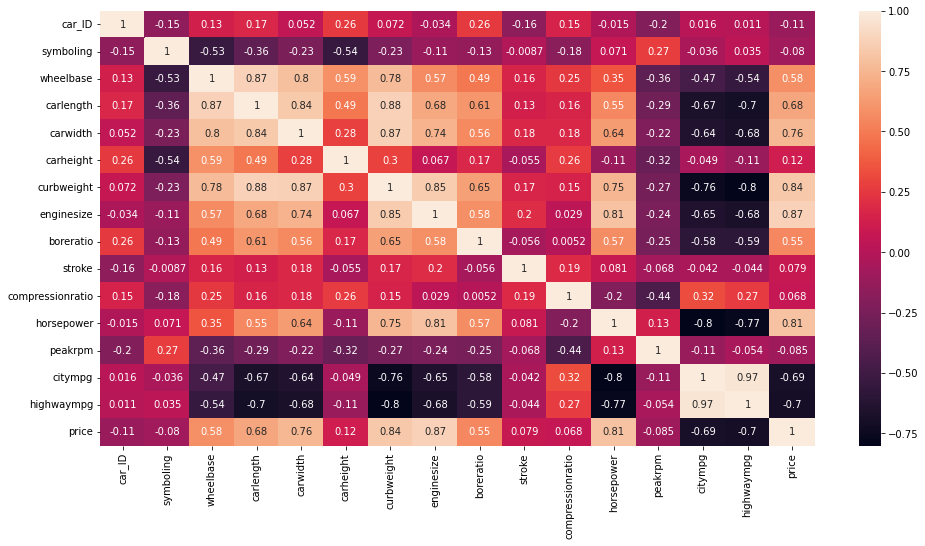

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(car.corr(),annot=True)
plt.show()

# Función para seleccionar columnas con una correlación específica 

In [17]:
def correlation(car,threshold):
  cols_corr = set()
  corr_matrix = car.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) >= threshold:
                 col_name = corr_matrix.columns[i]
                 cols_corr.add(col_name)
  return cols_corr
      

In [18]:
corr_cols = correlation(car.iloc[:,:-1],0.40)
corr_cols

{'boreratio',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'wheelbase'}

# Separar columnas categóricas

In [19]:
def categorical(car):
  categorical_col = []
  for col in car:
    if car[col].dtype == 'object':
      categorical_col.append(col)
  return categorical_col

In [20]:
categorical_col = categorical(car)
print(categorical_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


#Obtener columnas numericas


In [21]:
def numerical(car):
  numerical_col = []
  for col in car:
    if car[col].dtype != 'object':
      numerical_col.append(col)
  return numerical_col

In [22]:
numerical_col = numerical(car)
print(numerical_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


# Gráficar columna categóricas COUNT y BOX PLOT

In [23]:
print(len(categorical_col))
categorical_col.remove('CarName')
print(len(categorical_col))

10
9


#Gráficar una colummna 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


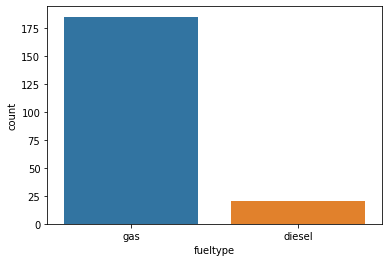

In [24]:
sns.countplot(car['fueltype'])

# Gráficar todas las columnas categóricas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

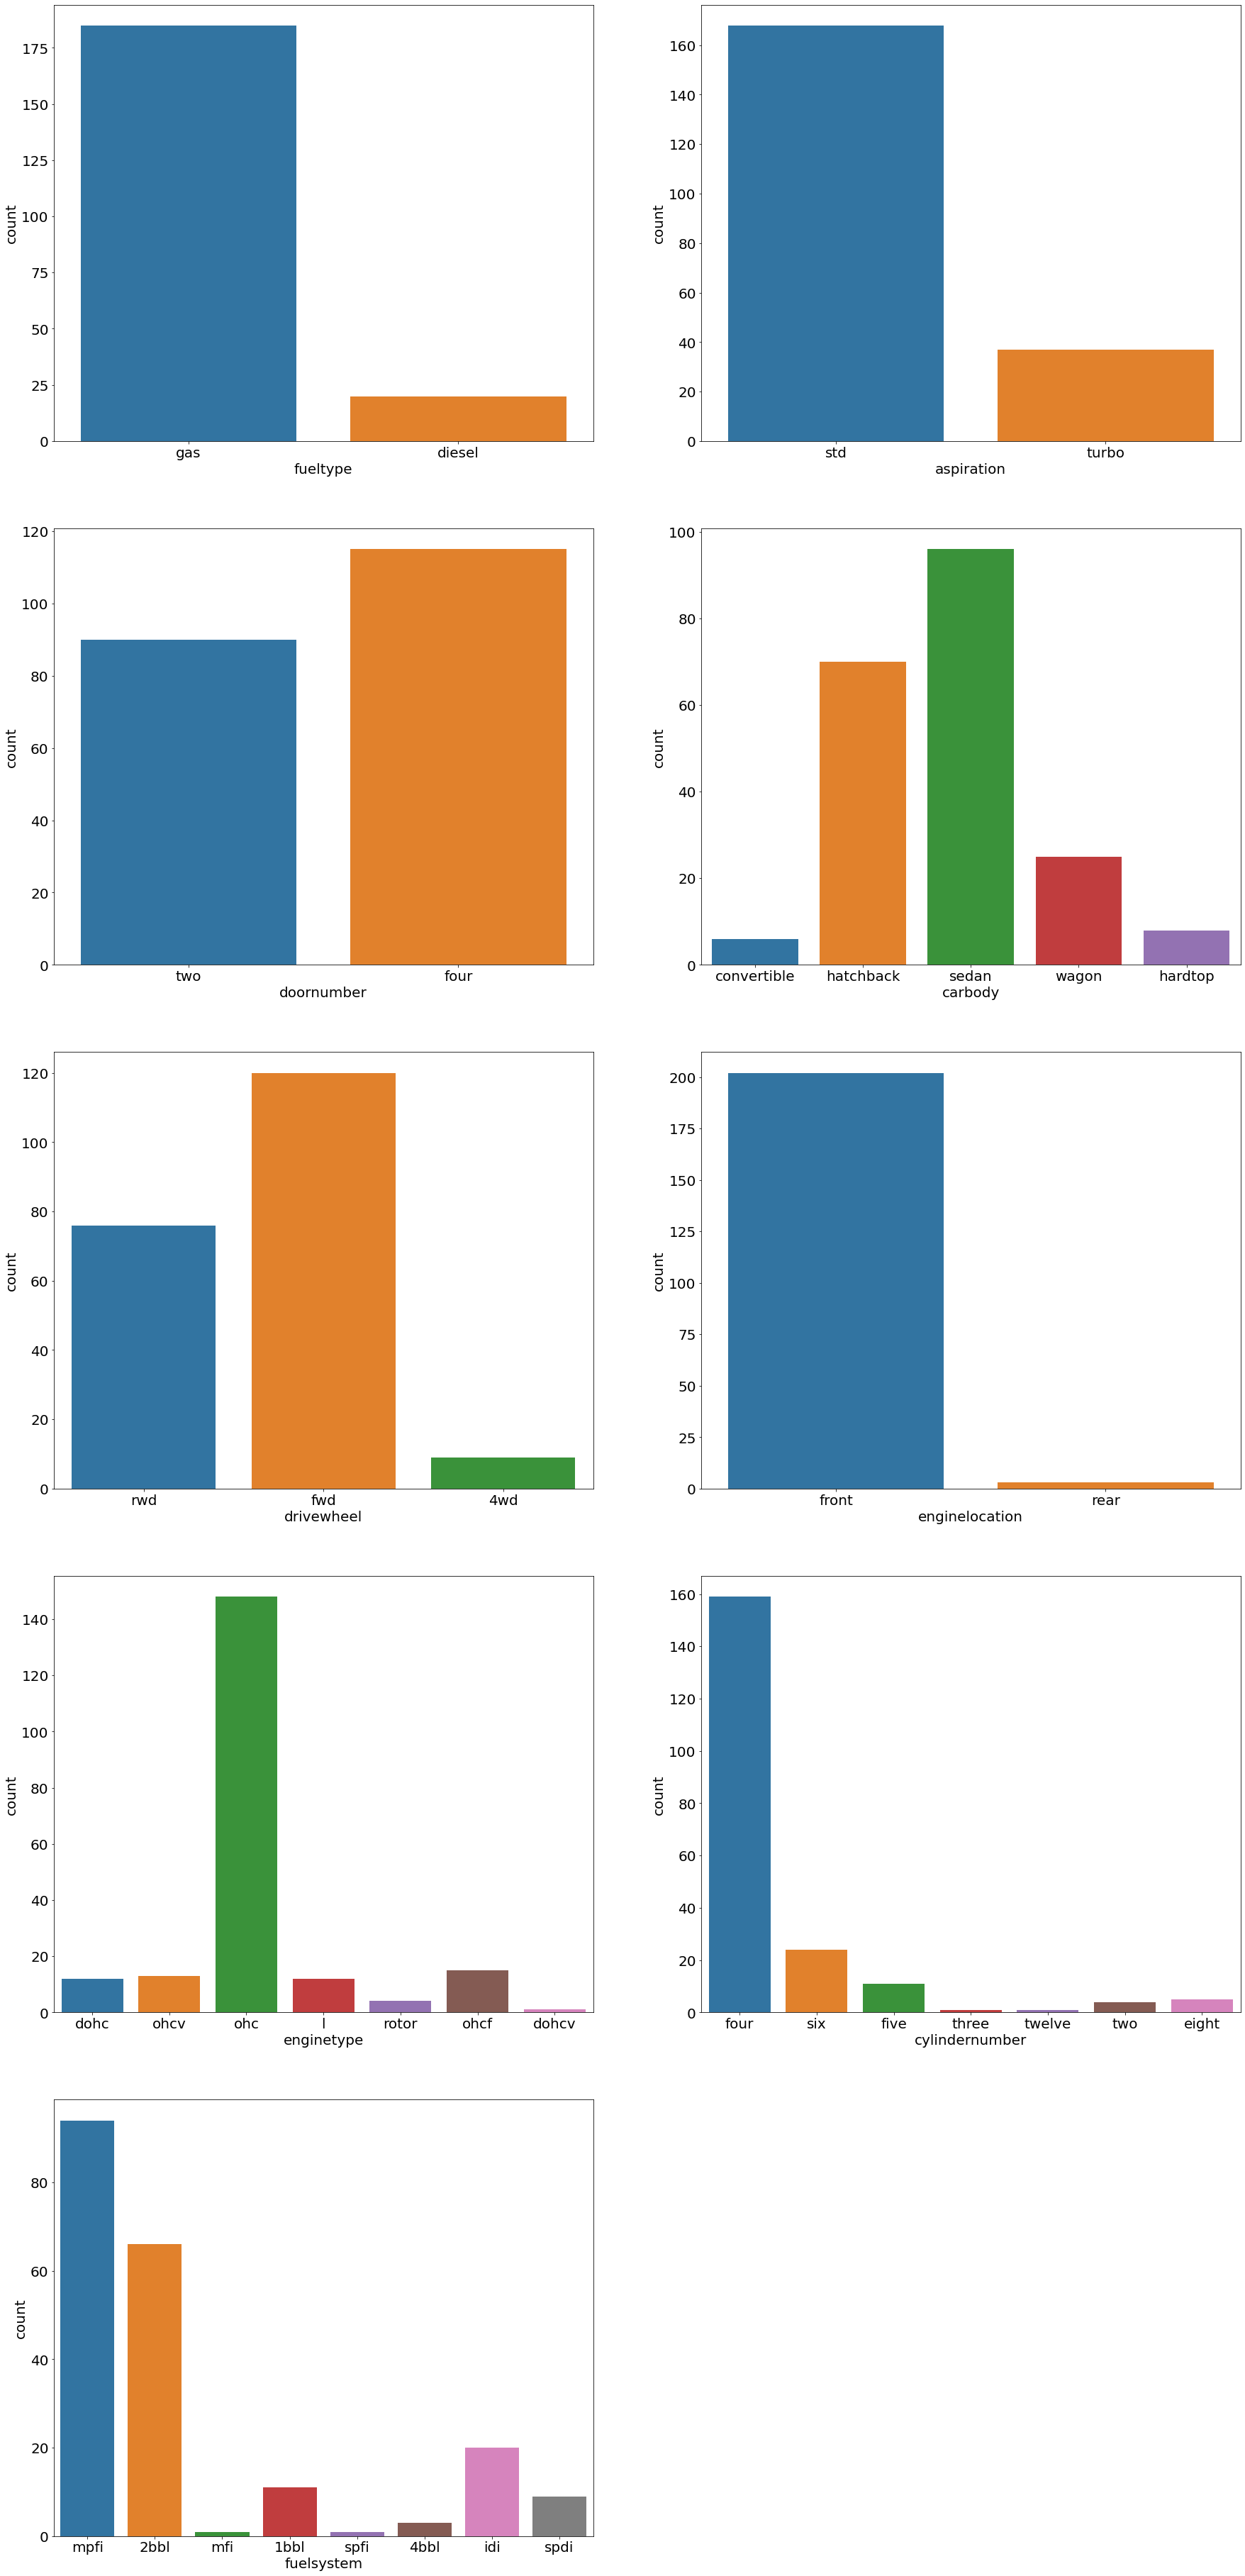

In [25]:
i=1
plt.figure(figsize=(30,120))
for col in categorical_col:
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(car[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

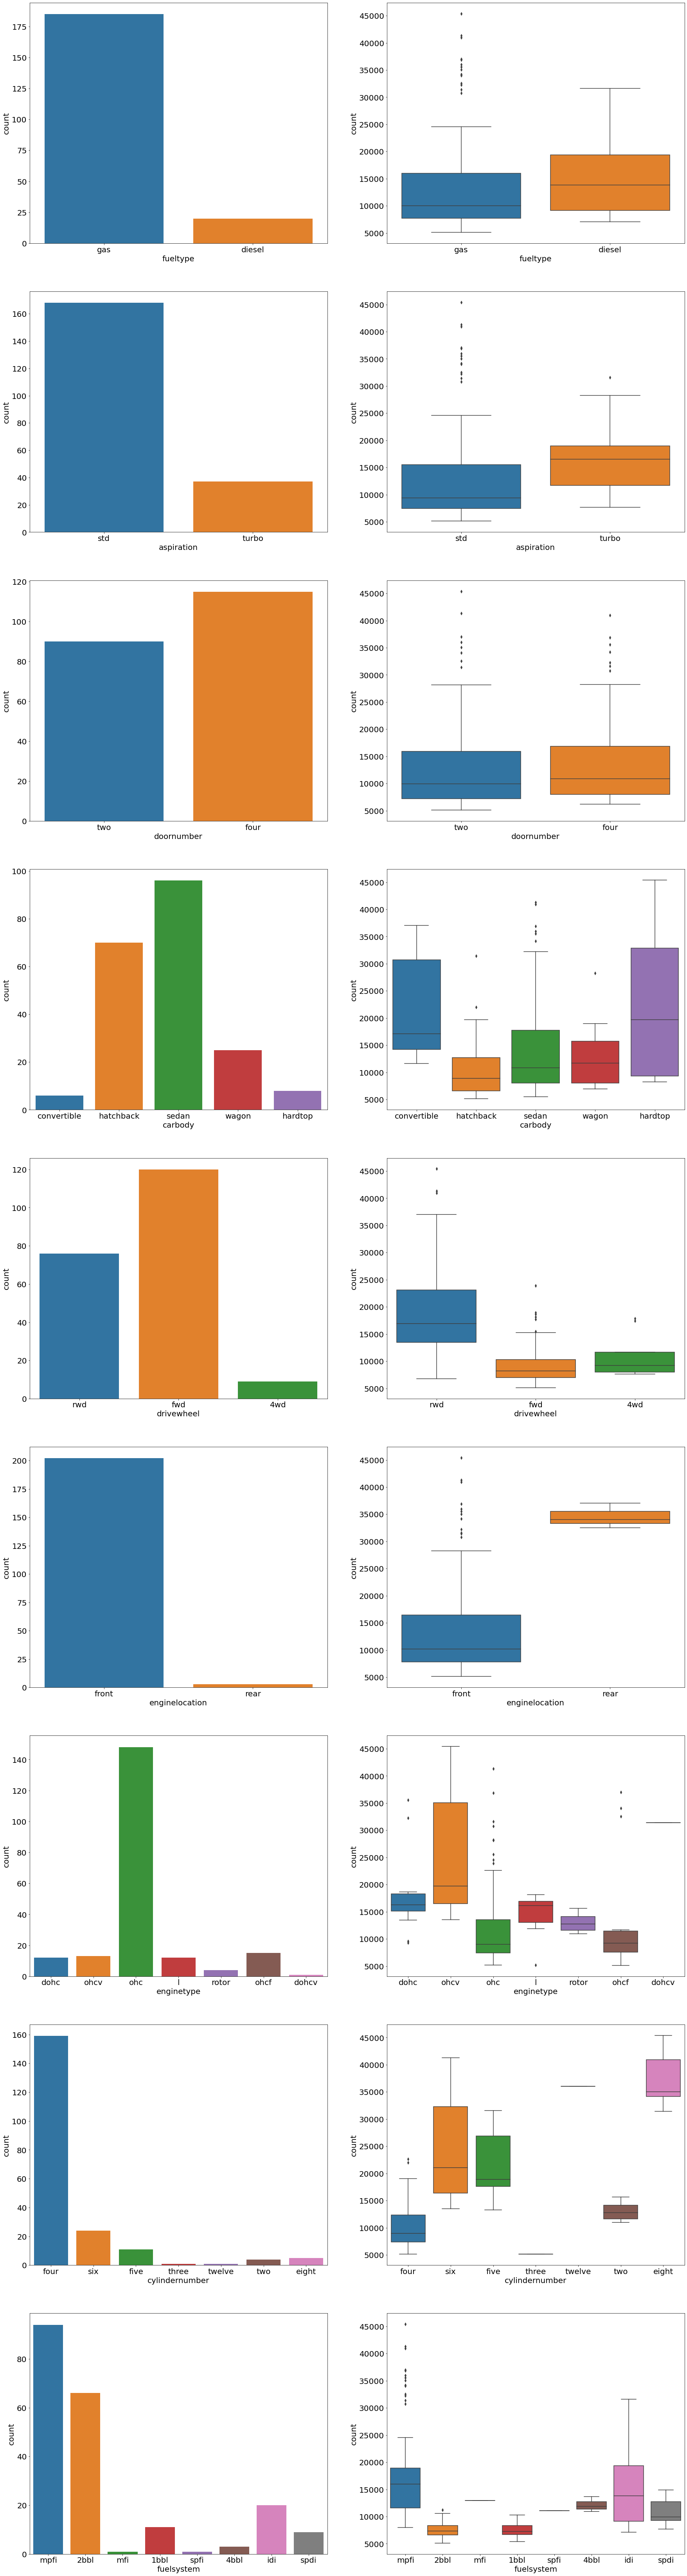

In [26]:
i=1
plt.figure(figsize=(30,120))
for col in categorical_col:
  # COUNT PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(car[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i+1

  # BOX PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.boxplot(x=car[col],y=car['price'])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i+1
plt.show()

#Gráficar las columnas numéricas

In [27]:
numerical_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [28]:
numerical_col.remove('car_ID')
numerical_col.remove('price')

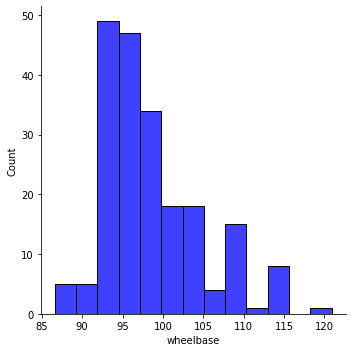

In [29]:
sns.displot(car['wheelbase'],color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

<function matplotlib.pyplot.show>

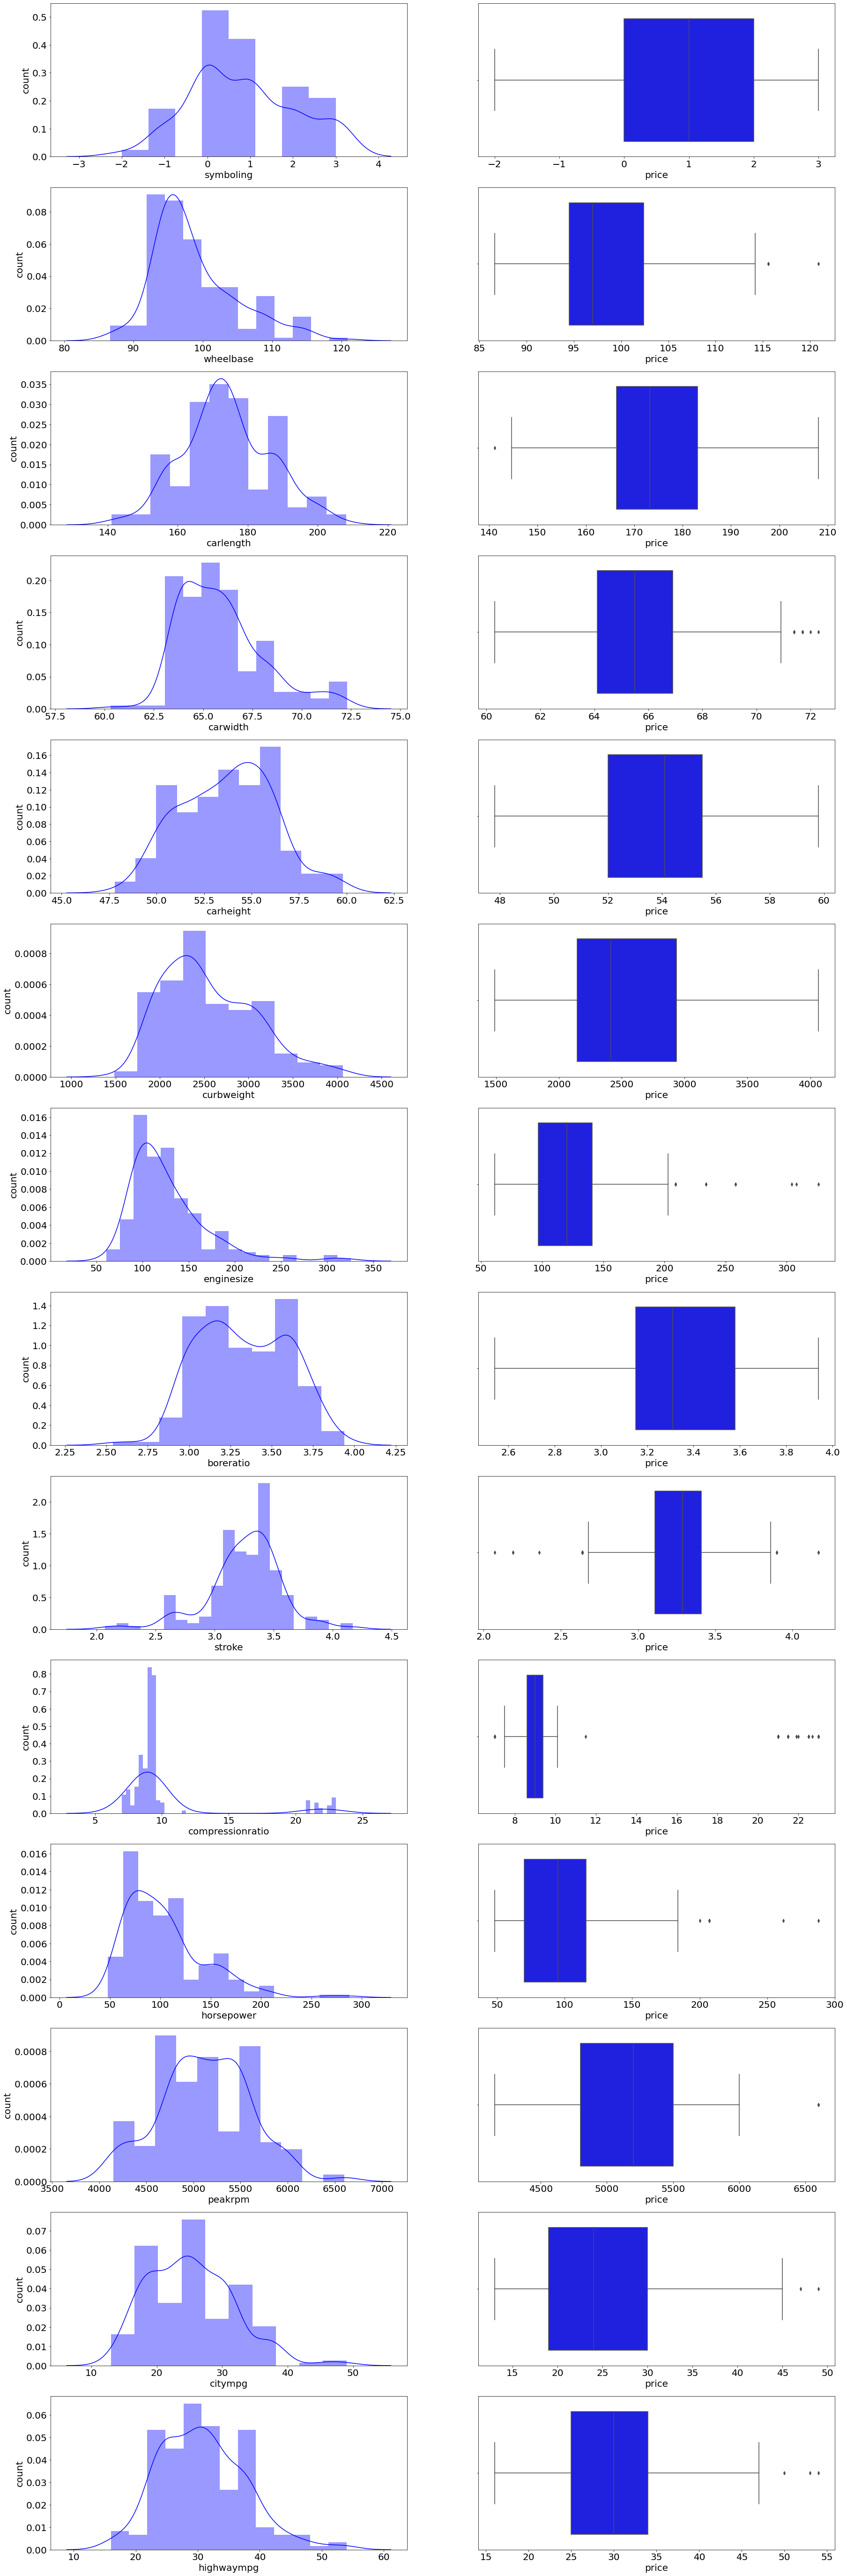

In [30]:
i=1
plt.figure(figsize=(30,100))
for col in numerical_col:
  plt.subplot(len(numerical_col),2,i)
  sns.distplot(car[col],color='blue')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i + 1
  plt.subplot(len(numerical_col),2,i)
  sns.boxplot(car[col],color="blue")
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.xlabel("price",fontsize=20)

  i = i + 1

plt.show

#Precio


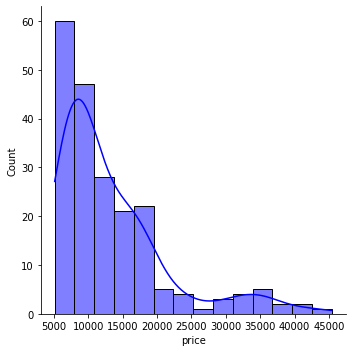

In [31]:
sns.displot(car['price'],color='blue',kde=True)

In [32]:
car['price'].skew()

1.7776781560914454

# Normalizar con **min-max**


In [33]:
def mimax_norm(car):
  return (car - car.min()) / (car.max() - car.min()) 

In [34]:
print(car['price'])

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [35]:
temporal = mimax_norm(car['price'])
print(temporal)

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64


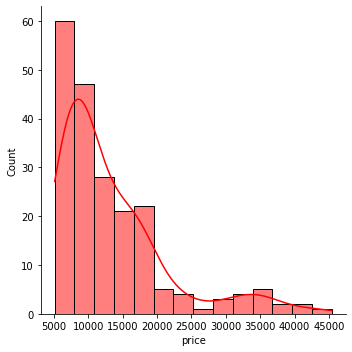

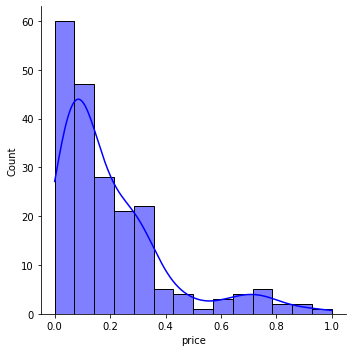

In [36]:
sns.displot(car['price'],color='red',kde=True)
sns.displot(temporal, color='blue', kde=True)

# Transformación log

# Importar librerias

In [37]:
from sklearn.preprocessing import FunctionTransformer

# Seleccionar Función


In [38]:
ft = FunctionTransformer(func=np.log)

In [39]:
temporal2 = ft.fit_transform(car['price'])

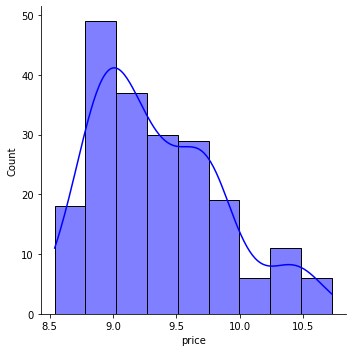

In [40]:
sns.displot(temporal2,color='blue',kde=True)

# Columnas categóricas a numéricas

In [41]:
import pandas as pd

In [42]:
dataframe_cat = pd.DataFrame({
    'datos':[46,89,45],
    'edad': [10,23,18],
    'genero': ['f','m','f']
})

In [43]:
dataframe_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   datos   3 non-null      int64 
 1   edad    3 non-null      int64 
 2   genero  3 non-null      object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [44]:
dataframe_cat.describe()

,datos,edad
count,3.000000,3.000000
mean,60.000000,17.000000
std,25.119713,6.557439
min,45.000000,10.000000
25%,45.500000,14.000000
50%,46.000000,18.000000
75%,67.500000,20.500000
max,89.000000,23.000000


# drop_first con False


In [45]:
pd.get_dummies(dataframe_cat,columns=['genero'],drop_first=False)

,datos,edad,genero_f,genero_m
0,46,10,1,0
1,89,23,0,1
2,45,18,1,0


# drop_first con True

In [46]:
dataframe_cat = pd.get_dummies(dataframe_cat,columns=['genero'],drop_first=True)

In [47]:
dataframe_cat.describe()

,datos,edad,genero_m
count,3.000000,3.000000,3.000000
mean,60.000000,17.000000,0.333333
std,25.119713,6.557439,0.577350
min,45.000000,10.000000,0.000000
25%,45.500000,14.000000,0.000000
50%,46.000000,18.000000,0.000000
75%,67.500000,20.500000,0.500000
max,89.000000,23.000000,1.000000


# Múltiples columnas categóricas

In [48]:
dataframe_cat = pd.DataFrame({
    'datos':[46,89,45],
    'edad': [10,23,18],
    'genero': ['f','m','f'],
    'estudio': ['si','si','no']
})

In [49]:
dataframe_cat

,datos,edad,genero,estudio
0,46,10,f,si
1,89,23,m,si
2,45,18,f,no


In [50]:
pd.get_dummies(dataframe_cat, columns=['genero','estudio'],drop_first=False)

,datos,edad,genero_f,genero_m,estudio_no,estudio_si
0,46,10,1,0,0,1
1,89,23,0,1,0,1
2,45,18,1,0,1,0


In [51]:
pd.get_dummies(dataframe_cat, columns=['genero','estudio'],prefix='dummy',drop_first=False)

,datos,edad,dummy_f,dummy_m,dummy_no,dummy_si
0,46,10,1,0,0,1
1,89,23,0,1,0,1
2,45,18,1,0,1,0


# Múltiples columnas categoricas y múltiples valores

In [61]:
dataframe_cat = pd.DataFrame({
    'datos':[46,89,45],
    'edad': [10,23,18],
    'genero': ['f','m','f'],
    'estudia': ['si','si','no'],
    'nivel_estudio': ['primaria','secundaria','universidad']
})

In [62]:
dataframe_cat.describe()

,datos,edad
count,3.000000,3.000000
mean,60.000000,17.000000
std,25.119713,6.557439
min,45.000000,10.000000
25%,45.500000,14.000000
50%,46.000000,18.000000
75%,67.500000,20.500000
max,89.000000,23.000000


In [63]:
dataframe_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   datos          3 non-null      int64 
 1   edad           3 non-null      int64 
 2   genero         3 non-null      object
 3   estudia        3 non-null      object
 4   nivel_estudio  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 248.0+ bytes


In [64]:
pd.get_dummies(dataframe_cat,columns=['genero','estudia','nivel_estudio'])

,datos,edad,genero_f,genero_m,estudia_no,estudia_si,nivel_estudio_primaria,nivel_estudio_secundaria,nivel_estudio_universidad
0,46,10,1,0,0,1,1,0,0
1,89,23,0,1,0,1,0,1,0
2,45,18,1,0,1,0,0,0,1


In [66]:
dataframe_cat = pd.get_dummies(dataframe_cat,columns=['genero','estudia','nivel_estudio'])

In [67]:
dataframe_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   datos                      3 non-null      int64
 1   edad                       3 non-null      int64
 2   genero_f                   3 non-null      uint8
 3   genero_m                   3 non-null      uint8
 4   estudia_no                 3 non-null      uint8
 5   estudia_si                 3 non-null      uint8
 6   nivel_estudio_primaria     3 non-null      uint8
 7   nivel_estudio_secundaria   3 non-null      uint8
 8   nivel_estudio_universidad  3 non-null      uint8
dtypes: int64(2), uint8(7)
memory usage: 197.0 bytes


# CONCLUSIONES
En lo personal las actividades que estamos viendo hasta el momento soy muy interesantes ya que con los cursos que hemos tenido nos han ayudado bastante a comprender más a fondo las funciones y como es que podemos hacer el análisis de los datos. También es importante saber extraer un csv para el manejo de la información que se va análizar porque hay varias opciones, para mi fue un poco difícil porque al principio no me salia la información que quería extraer si no que investigando me encontre con algunas opciones las cuales me fueron muy útiles.